# Week 12 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [1]:
import pandas as pd

In [5]:
# file location
file = "Unplanned_Hospital_Visits-Hospital.csv"

# Using pandas to read the .csv file into a dataframe
unplanned = pd.read_csv(file)

# looking at the dataframe's dimensions
unplanned.shape

(68348, 20)

In [6]:
# Peaking at the data just for our info
unplanned.head()

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure ID,Measure Name,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Number of Patients,Number of Patients Returned,Footnote,Start Date,End Date
0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,EDAC_30_AMI,Hospital return days for heart attack patients,Average Days per 100 Discharges,620,7,-5.4,21.7,589,171,NaN,07/01/2016,06/30/2019
1,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,EDAC_30_HF,Hospital return days for heart failure patients,More Days Than Average per 100 Discharges,1106,21.6,7.8,36.3,842,310,NaN,07/01/2016,06/30/2019
2,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,EDAC_30_PN,Hospital return days for pneumonia patients,Fewer Days Than Average per 100 Discharges,594,-20.6,-32.9,-7.8,540,132,NaN,07/01/2016,06/30/2019
3,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,OP_32,Rate of unplanned hospital visits after colono...,No Different Than the National Rate,511,14.1,10.4,19.2,Not Applicable,Not Applicable,NaN,01/01/2017,12/24/2019
4,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,OP_35_ADM,Rate of inpatient admissions for patients rece...,No Different Than the National Rate,192,11.3,8.8,14.2,Not Applicable,Not Applicable,NaN,01/01/2019,12/01/2019


### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?

In [22]:
# Checking how many unqiue values are contained in each field

# Creating a new dataframe containing the fields and their unique value counts
unique_counts_df = unplanned.nunique().reset_index()

# Renaming columns
unique_counts_df.columns = ["field", "unique_values"]

# Sorting by unique values and printing
unique_counts_df.sort_values("unique_values", ascending = False)

,field,unique_values
0,Facility ID,4882
7,Phone Number,4863
2,Address,4855
1,Facility Name,4727
5,ZIP Code,4455
11,Denominator,3070
3,City,2958
6,County Name,1558
14,Higher Estimate,1427
12,Score,1243


In [25]:
# Which field has the most unique values? It's obvious from the dataframe but to do it programmatically I can do this:
unique_counts_df.sort_values("unique_values", ascending = False)["field"][0]

'Facility ID'

### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [72]:
# Well, we can tell from the unique value count exercise that all the columns have more than 1 unique value, so we can deduce that there will be no columns where every row is the same.
# Nevertheless, we can programmatically check if there are any columns like this

def column_check(df):
    """
    (pandas dataframe) -> list/string
    
    Feed the function a dataframe and this function will tell you which field(s) have only one single value.
    """
    
    df_trans = df.nunique().reset_index()
    df_trans.columns = ["field", "unique_values"]
    
    result = []
    
    for i in list(df_trans['field']):
        if list((df_trans[df_trans['field'] == i]['unique_values'] == 1))[0]:
            result = result.append(i)
    
    if (result == []):
        result = 'All columns contain more than 1 unique value!'
        
    return result

In [74]:
column_check(unplanned)

'All columns contain more than 1 unique value!'

### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

In [111]:
unplanned_clean.dtypes

Facility ID                     object
Facility Name                   object
Address                         object
City                            object
State                           object
ZIP Code                         int64
County Name                     object
Phone Number                    object
Measure ID                      object
Measure Name                    object
Compared to National            object
Denominator                     object
Score                           object
Lower Estimate                  object
Higher Estimate                 object
Number of Patients              object
Number of Patients Returned     object
Footnote                       float64
Start Date                      object
End Date                        object
dtype: object

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


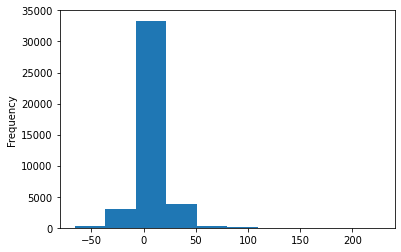

In [125]:
# cleaning the data a little bit. I plan to use the score column
unplanned_clean = unplanned[unplanned['Score'] != 'Not Available']
unplanned_clean['Score'] = unplanned_clean['Score'].astype(float)

# Plotting
unplanned_clean.Score.plot.hist()

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

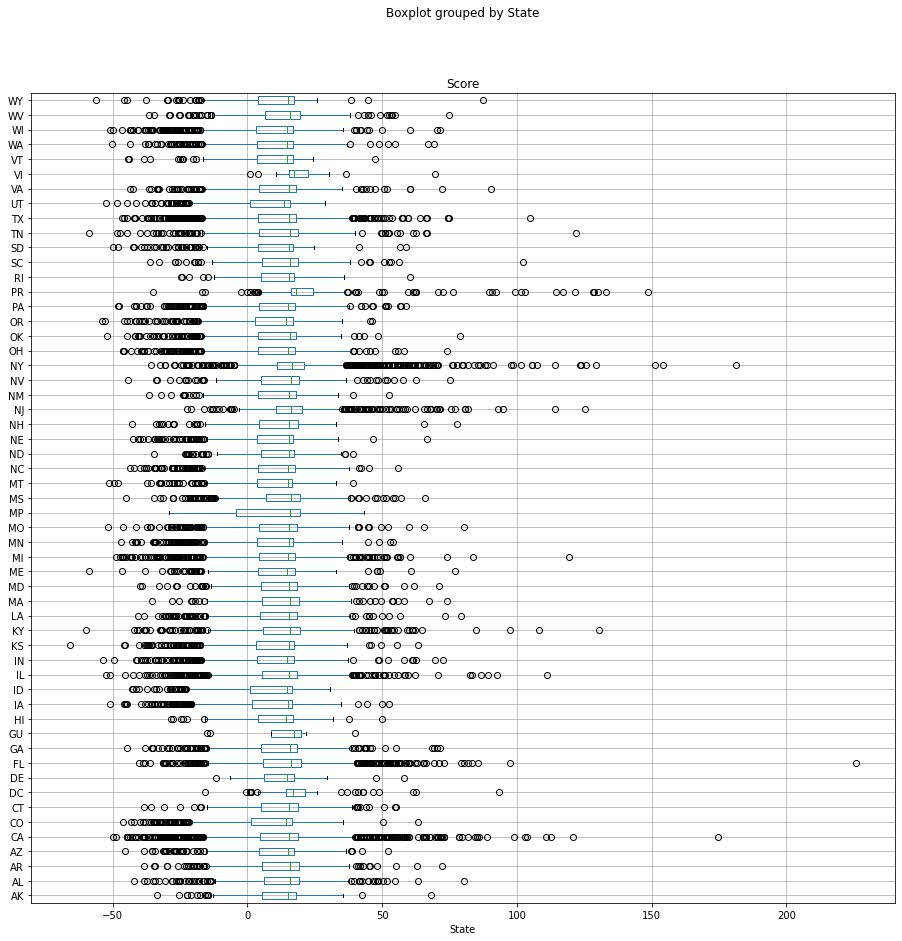

In [133]:
# I want to look at boxplots of score for each state, rotated 

unplanned_clean.boxplot(column = 'Score',
                        by = 'State',
                        vert = False,
                       figsize = (15,15))

---

## Submitting Your Work

In order to submit your work, you'll need to use the `git` command line program to **add** your homework file (this file) to your local repository, **commit** your changes to your local repository, and then **push** those changes up to github.com.  From there, I'll be able to **pull** the changes down and do my grading.  I'll provide some feedback, **commit** and **push** my comments back to you.  The first line of code below will **pull** down my comments into your local folders.

To run through everything one last time and submit your work:
1. Use the `Kernel` -> `Restart Kernel and Run All Cells` menu option to run everything from top to bottom and stop here.
2. Save this note with Ctrl-S (or Cmd-S)
2. Skip down to the last command cell (the one starting with `%%bash`) and run that cell.

If anything fails along the way with this submission part of the process, let me know.  I'll help you troubleshoort.

In [ ]:
assert False, "DO NOT REMOVE THIS LINE"

---

In [ ]:
%%bash
git pull
git add week12_assignment_2.ipynb
git commit -a -m "Submitting the week 12 assignment"
git push


---

If the message above says something like _Submitting the week 10 review exercises_ or _Everything is up to date_, then your work was submitted correctly.